### Challenge Test 5 (Machine Learning)

##### 1. Estima cuáles serían los mejores valores de los parámetros de SVM para el problema de reconocimiento de dígitos.

(1797, 8, 8)


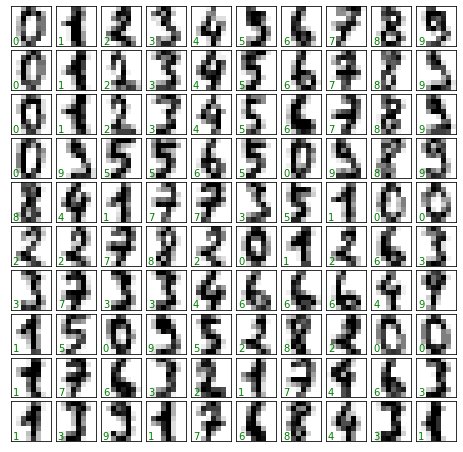

In [1]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


digits = load_digits()
print(digits.images.shape)

fig, axes = plt.subplots(10, 10, figsize = (8, 8), subplot_kw = {'xticks' : [] , 'yticks' : []},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color = 'green')

In [2]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV


param_grid = [
    {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], 'kernel': ['rbf']},
    {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']},
    {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'kernel': ['linear']}
]

clf = GridSearchCV(SVC(class_weight = 'balanced'), param_grid)


X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42)

clf.fit(X_train, y_train)
    
clf_best = clf.best_params_
    
y_pred = clf.predict(X_test)
print(f"Exactitud: {accuracy_score(y_pred, y_test)}, mejor modelo: {clf_best}")

Exactitud: 0.9882154882154882, mejor modelo: {'C': 1000.0, 'gamma': 0.0005, 'kernel': 'rbf'}


##### Con KFold sería:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, GridSearchCV


param_grid = [
    {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], 'kernel': ['rbf']},
    {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']},
    {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'kernel': ['linear']}
]

clf = GridSearchCV(SVC(class_weight = 'balanced'), param_grid)

kf = KFold(n_splits = 5, shuffle = True)
X = digits.data
y = digits.target
for i, (tr, tst) in enumerate(kf.split(X)):
    X_train = X[tr, :]
    y_train = y[tr]
    X_test = X[tst, :]
    y_test = y[tst]
    clf.fit(X_train, y_train)
    clf_best = clf.best_estimator_
    y_pred = model.predict(X_test)
    print(f"Exactitud: {accuracy_score(y_pred, y_test)}, mejor modelo: {clf_best}")

##### 2. Escribe un clasificador para determinar si un mensaje es spam o no. (https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.zip) 

In [3]:
import numpy as np
import pandas as pd

data_file = r'C:\Users\Usuario\Desktop\spambase.data'
names_file = r'C:\Users\Usuario\Desktop\spambase.names'

# Cargar nombres de características desde spambase.names
feature_names = []
with open(names_file, 'r') as file:
    for line in file:
        if line.startswith('word_freq_') or line.startswith('char_freq_') or line.startswith('capital_run_length_'):
            feature_name = line.split(':')[0].strip()  # Extraer el nombre de la característica
            feature_names.append(feature_name)

# Agregar el nombre para la columna target
feature_names.append('class')

# Cargar datos desde spambase.data
df = pd.read_csv(data_file, header=None, names=feature_names)

# Mostrar las primeras filas del DataFrame con nombres de características
print(df.head())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1 

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

clf = DecisionTreeClassifier()

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42)

pca = PCA(n_components = 0.95)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf.fit(X_train_pca, y_train)
    
y_pred = clf.predict(X_test_pca)
print(f"Exactitud: {accuracy_score(y_pred, y_test)}")

Exactitud: 0.7307439104674127


##### 3. Utiliza el conjunto de datos "iris" para realizar una clasificación de especies de flores utilizando diferentes algortimos de clasificación en scikit-learn, como SVM, Random Forest y k-Nearest Neighbors. Evalúa el rendimiento de cada algoritmo utilizando métricas como la matriz de confusión y la precisión 

In [5]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

modelsvm = SVC()
modelRF = RandomForestClassifier()
modelKnn = KNeighborsClassifier()

clfsvm = modelsvm.fit(X_train, y_train)
clfRF = modelRF.fit(X_train, y_train)
clfKnn = modelKnn.fit(X_train, y_train)

y_pred_svm = clfsvm.predict(X_test)
y_pred_RF = clfRF.predict(X_test)
y_pred_Knn = clfKnn.predict(X_test)

print(fr"""Precisión SVM: {precision_score(y_pred_svm, y_test, average = 'weighted')}  
Precisión RF: {precision_score(y_pred_RF, y_test, average = 'weighted')} 
Precisión Knn: {precision_score(y_pred_Knn, y_test, average = 'weighted')}""")

print(f"""Matriz confusión SVM: {confusion_matrix(y_pred_svm, y_test)}  
Matriz confusión RF: {confusion_matrix(y_pred_RF, y_test)} 
Matriz confusión Knn: {confusion_matrix(y_pred_Knn, y_test)}""")

Precisión SVM: 1.0  
Precisión RF: 0.98125 
Precisión Knn: 0.98125
Matriz confusión SVM: [[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]  
Matriz confusión RF: [[19  0  0]
 [ 0 15  1]
 [ 0  0 15]] 
Matriz confusión Knn: [[19  0  0]
 [ 0 15  1]
 [ 0  0 15]]


##### 4. Utiliza el conjunto de datos "digits" para realizar una clasificación de dígitos usando SVM con PCA, validación cruzada y estimación de parámetros. Guarda el clasificador estimado, define un patrón de un dígito manuscrito y prueba el clasificador. 

(1797, 8, 8)
Exactitud: 0.9916666666666667, mejor modelo: {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}
Exactitud: 0.9944444444444445, mejor modelo: {'C': 1000.0, 'gamma': 0.0005, 'kernel': 'rbf'}
Exactitud: 0.9916434540389972, mejor modelo: {'C': 1000.0, 'gamma': 0.0005, 'kernel': 'rbf'}
Exactitud: 0.9916434540389972, mejor modelo: {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}
Exactitud: 0.9860724233983287, mejor modelo: {'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}


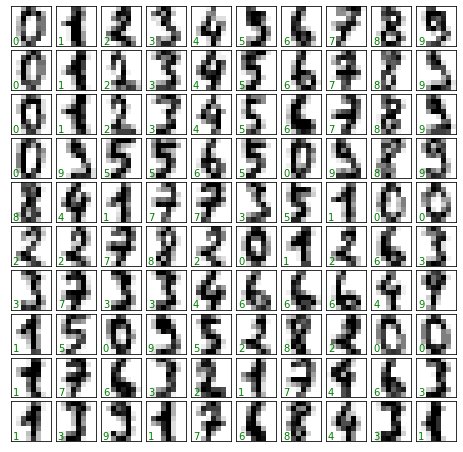

In [6]:
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

digits = load_digits()
print(digits.images.shape)

fig, axes = plt.subplots(10, 10, figsize = (8, 8), subplot_kw = {'xticks' : [] , 'yticks' : []},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform = ax.transAxes, color = 'green')
    
param_grid = [
    {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], 'kernel': ['rbf']},
    {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']},
    {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'kernel': ['linear']}
]

clf = GridSearchCV(SVC(class_weight = 'balanced'), param_grid)


X = digits.data
y = digits.target

pca = PCA(n_components = 0.95)


kf = KFold(n_splits = 5, shuffle = True)
X = digits.data
y = digits.target

for i, (tr, tst) in enumerate(kf.split(X)):
    X_train = X[tr, :]
    y_train = y[tr]
    X_test = X[tst, :]
    y_test = y[tst]
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    clf.fit(X_train_pca, y_train)
    clf_best = clf.best_params_
    y_pred = clf.predict(X_test_pca)
    print(f"Exactitud: {accuracy_score(y_pred, y_test)}, mejor modelo: {clf_best}")